In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand
%matplotlib inline

In [443]:
# read in data
thievery = pd.read_csv("stolen_art_new.csv")
thievery.head()

,title,maker,crimeCategory,primaryMaterial,numMaterials,century,size,units
0,Shakti II,Benjamin Creme,print,lithograph,1,21st,4.227396,square feet
1,Seated Woman,Raphael Soyer,drawing-watercolour,other,2,other,4.276389,square feet
2,Magda and Raymond,Walter Pach,paintings,oil,2,20th,3.334000,square feet
3,Jan,Edna Hibel,print,lithograph,1,20th,NaN,NaN
4,Tiger painting,Michael Ward,paintings,watercolor,1,20th,18.335000,square feet


## 1. Distribution of Sizes

### With outliers

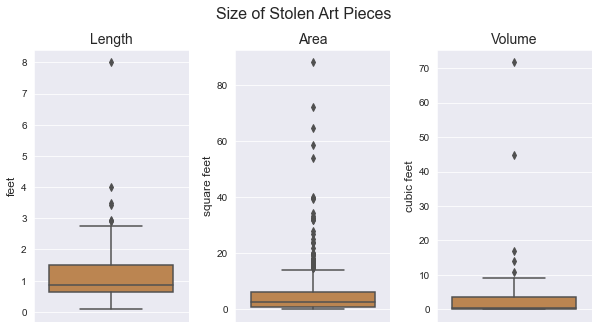

In [444]:
# datasets filtered by dimension
one = thievery[thievery['units'] == "feet"]['size']
two = thievery[thievery['units'] == "square feet"]['size']
three = thievery[thievery['units'] == "cubic feet"]['size']

# function that will plot sizes for each dimension
def sizeplot(dims, title, col, dist = 1):
    # distribution of size of pieces for each dimension
    sns.set_style("darkgrid")

    # create three subplots, one for each dimension
    fig, axes = plt.subplots(1,3)
    fig.set(figwidth=10, figheight=5)

    # boxplots for each (plotting on separate y-axis scales)
    sns.boxplot(y=dims[0], ax=axes[0], color=col)
    sns.boxplot(y=dims[1], ax=axes[1], color=col)
    sns.boxplot(y=dims[2], ax=axes[2], color=col)

    # set titles of axes
    fig.suptitle(title, fontsize='16', y=dist)
    axes[0].set_title('Length', fontsize='14')
    axes[1].set_title('Area', fontsize='14')
    axes[2].set_title('Volume', fontsize='14')
    axes[0].set_ylabel('feet', fontsize='12')
    axes[1].set_ylabel('square feet', fontsize='12')
    axes[2].set_ylabel('cubic feet', fontsize='12')

    # put more horizontal space between plots
    fig.subplots_adjust(wspace=0.3)
    plt.show()

sizeplot([one, two, three], 'Size of Stolen Art Pieces', 'peru')

### Without most outliers

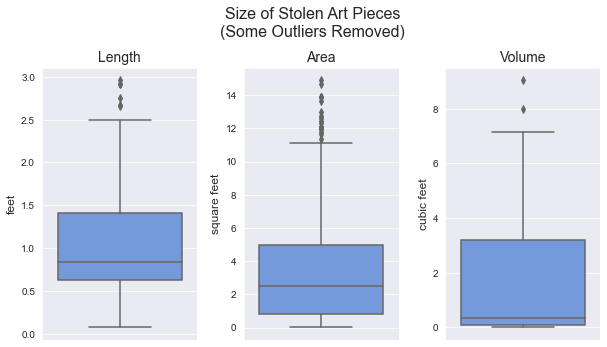

In [445]:
# same process as before, just with some outliers removed
sizeplot([one[one < 3], two[two < 15], three[three < 10]], 
'Size of Stolen Art Pieces\n(Some Outliers Removed)', "cornflowerblue", 1.05)


### Table of most extreme outliers

In [446]:
outliers = thievery[((thievery['units'] == 'feet') & (thievery['size'] > 5)) | ((thievery['units'] == 'square feet') & (thievery['size'] > 40)) | ((thievery['units'] == 'cubic feet') & (thievery['size'] > 40))].sort_values(by=['units','size'])
outliers.to_markdown()

'|     | title                              | maker              | crimeCategory   | primaryMaterial   |   numMaterials | century   |    size | units       |\n|----:|:-----------------------------------|:-------------------|:----------------|:------------------|---------------:|:----------|--------:|:------------|\n| 950 | Philad Long Rifle                  | H. Deringer Philad | other           | other             |              4 | 19th      | 44.913  | cubic feet  |\n| 666 | Garden Elements                    | Isamu Noguchi      | sculpture       | bronze            |              2 | 20th      | 71.671  | cubic feet  |\n| 953 | Caduceus | Staff of Asclepius      | Mary Ann Lohman    | sculpture       | other             |              1 | 20th      |  8      | feet        |\n| 341 | Stations of the Cross - 8          | Ben Stahl          | paintings       | nan               |              0 | 20th      | 54      | square feet |\n| 647 | Venice - et cum spiritu tuo        | Claire

### Fill in outliers with random value from IQR

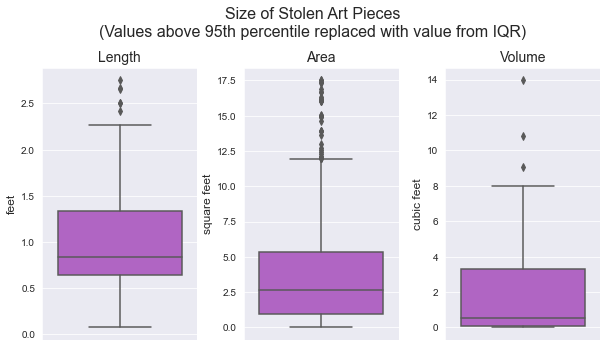

In [447]:
# Fill outliers with some value within the IQR
def fill_outliers(dim):
    cutoff = dim.quantile(0.95)
    q1 = dim.quantile(0.25)
    q3 = dim.quantile(0.75)
    return [round(rand.uniform(q1,q3),3) if i > cutoff else i for i in dim]

one_filled = fill_outliers(one)
two_filled = fill_outliers(two)
three_filled = fill_outliers(three)

sizeplot([one_filled, two_filled, three_filled], 
'Size of Stolen Art Pieces\n(Values above 95th percentile replaced with value from IQR)', "mediumorchid", 1.05)

## 2. Top Artists (no, this isn't suddenly Spotify)

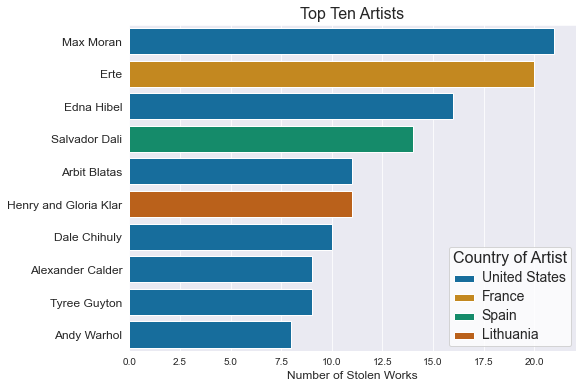

In [448]:
sns.set_style("darkgrid")
sns.set_palette("colorblind")
plt.figure(figsize=(8,6))

# set list of top artists (only individuals) and number of stolen paintings for each
# dict(thievery['maker'].value_counts())
artists = ['Max Moran', 'Erte', 'Edna Hibel', 'Salvador Dali', 'Henry and Gloria Klar', 'Arbit Blatas', 'Dale Chihuly', 'Tyree Guyton', 'Alexander Calder', 'Andy Warhol']
top_artists = thievery[thievery['maker'].isin(artists)]['maker'].value_counts().to_frame().reset_index()
# manually include country of each top artist
top_artists['country'] = ['United States', 'France', 'United States', 'Spain', 'United States', 'Lithuania', 'United States', 'United States', 'United States', 'United States']

# barplot of top artists, colored by country
ax = sns.barplot(y = 'index', x = 'maker', hue='country', data=top_artists, dodge=False)
ax.set_ylabel("")
ax.set_xlabel("Number of Stolen Works", fontsize='12')
ax.set_title("Top Ten Artists", fontsize='16')
legend = plt.legend(title='Country of Artist')
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='16')
plt.setp(ax.get_yticklabels(), fontsize='12')
legend.get_frame().set_facecolor('white')
plt.show()


## 3. Stolen Works by Century
I used a barplot instead of a lineplot because this categorizes stolen pieces by the century they were created. It doesn't provide a timeline of when pieces were stolen or when certain centuries were more "popular" among art thieves

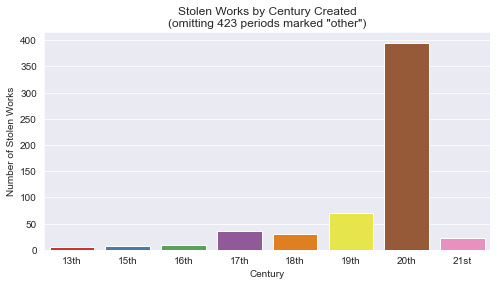

In [449]:
# manually order centuries chronologically and get n(works) for each
century_ordered = ['13th', '15th', '16th', '17th', '18th', '19th', '20th', '21st']
counts = thievery[thievery['century'] != 'other']['century'].value_counts()
counts_sorted = counts[century_ordered]

# bar plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x=counts.index, y=counts.values, order = century_ordered, palette = 'Set1')
ax.set_title('Stolen Works by Century Created\n(omitting 423 periods marked "other")')
ax.set_xlabel('Century')
ax.set_ylabel('Number of Stolen Works')
plt.show()

## 4. Materials used - what's considered more valuable?

In [450]:
# determine top three crime categories, then top four materials for each
# thievery['crimeCategory'].value_counts()
# thievery[thievery['crimeCategory'] == 'paintings']['primaryMaterial'].value_counts()
# thievery[thievery['crimeCategory'] == 'sculpture']['primaryMaterial'].value_counts()
# thievery[thievery['crimeCategory'] == 'print']['primaryMaterial'].value_counts()

# filter dataset to top crime categories and materials, then get value counts
main_crimes = ['paintings','sculpture','print']
main_materials = ['oil','watercolor','acrylic','gouache', 'bronze','wood','marble','glass', 'lithograph','serigraph','etching','paper']
mini_thievery = thievery[(thievery['crimeCategory'].isin(main_crimes)) & (thievery['primaryMaterial'].isin(main_materials))]
mini_counts = mini_thievery.groupby('crimeCategory')['primaryMaterial'].value_counts().unstack(0)

# only keep value counts for the top 4 materials of each top crime category
mini_counts.loc['acrylic', 'sculpture'] = np.nan
mini_counts.loc[['etching','paper','wood'], 'paintings'] = np.nan

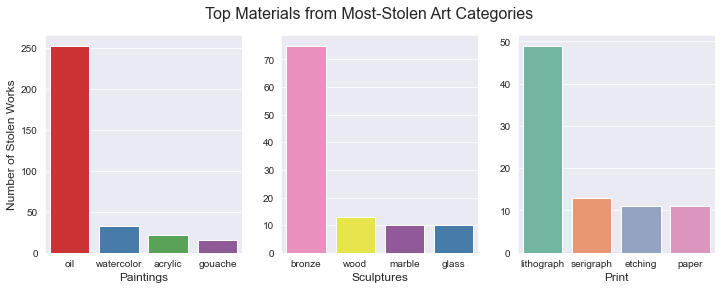

In [451]:
# create barplots for each crime category (paintings, sculpture, print)
sns.set_style("darkgrid")
fig, axes = plt.subplots(1,3)
fig.set(figwidth=12, figheight=4)
fig.suptitle('Top Materials from Most-Stolen Art Categories', fontsize='16')

sns.barplot(x=mini_counts['paintings'].index, ax=axes[0], y=mini_counts['paintings'].values, order=['oil', 'watercolor','acrylic','gouache'], palette = 'Set1')
axes[0].set_xlabel('Paintings', fontsize='12')
axes[0].set_ylabel('Number of Stolen Works', fontsize='12')

sns.barplot(x=mini_counts['sculpture'].index, ax=axes[1], y=mini_counts['sculpture'].values, order=['bronze','wood','marble','glass'], palette = 'Set1_r')
axes[1].set_xlabel('Sculptures', fontsize='12')
axes[1].set_ylabel('')

sns.barplot(x=mini_counts['print'].index, ax=axes[2], y=mini_counts['print'].values, order=['lithograph','serigraph','etching','paper'], palette = 'Set2')
axes[2].set_xlabel('Print', fontsize='12')
axes[2].set_ylabel('')

plt.show()